In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv(r'C:\Users\SDS\Downloads\housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [43]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [44]:
import matplotlib.pyplot as plt 
import seaborn as sns 

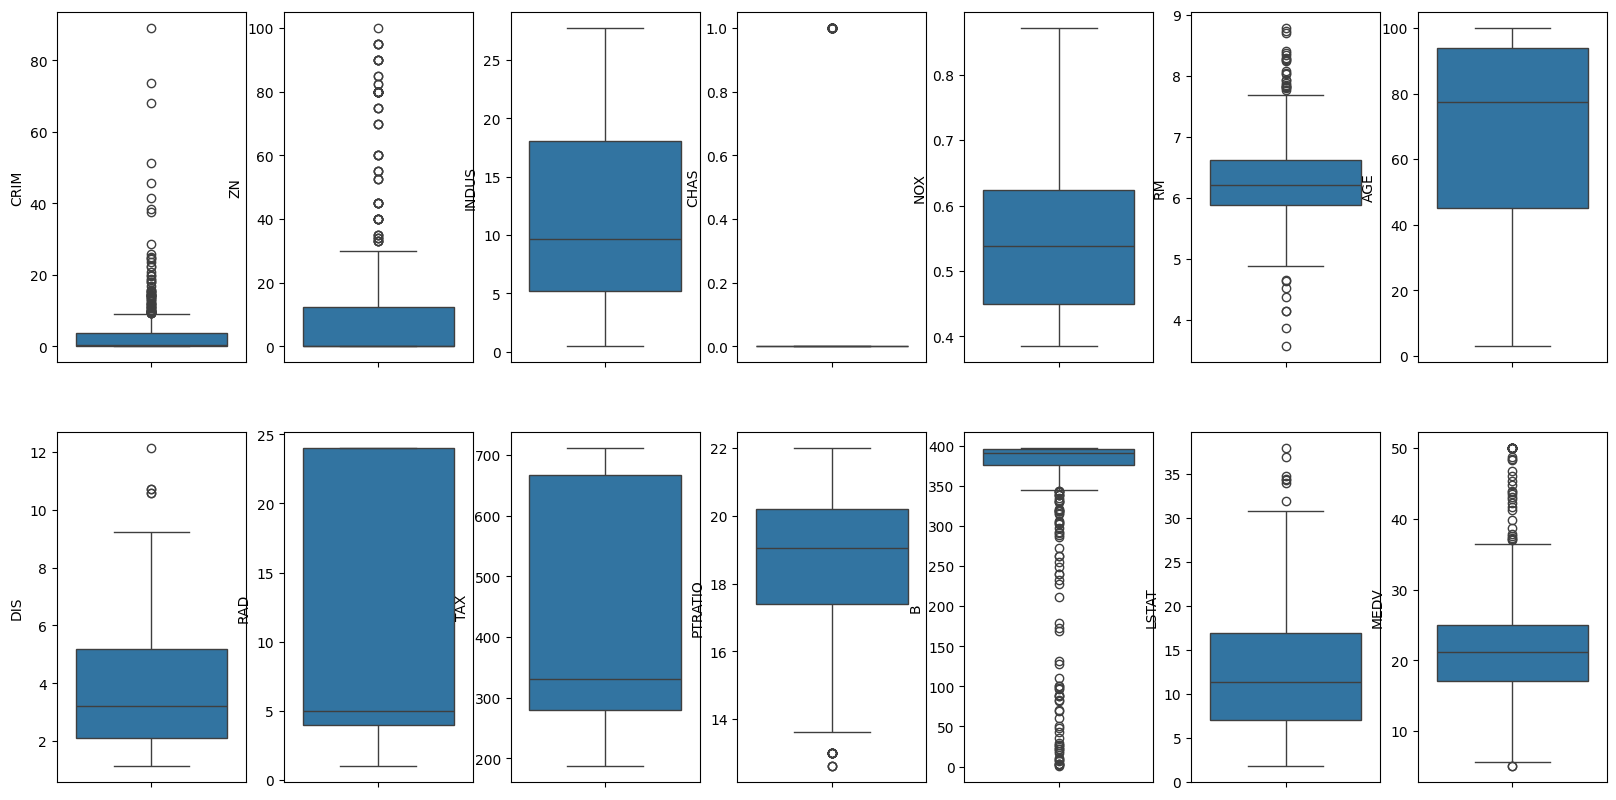

In [45]:
fig,axs=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=axs.flatten()
for k,v in data.items():
    sns.boxplot(data=data,y=k,ax=ax[index])
    index+=1
    
    

C:\Users\SDS\AppData\Local\Temp\ipykernel_16140\3640231402.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v,ax=ax[index])
C:\Users\SDS\AppData\Local\Temp\ipykernel_16140\3640231402.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v,ax=ax[index])
C:\Users\SDS\AppData\Local\Temp\ipykernel_

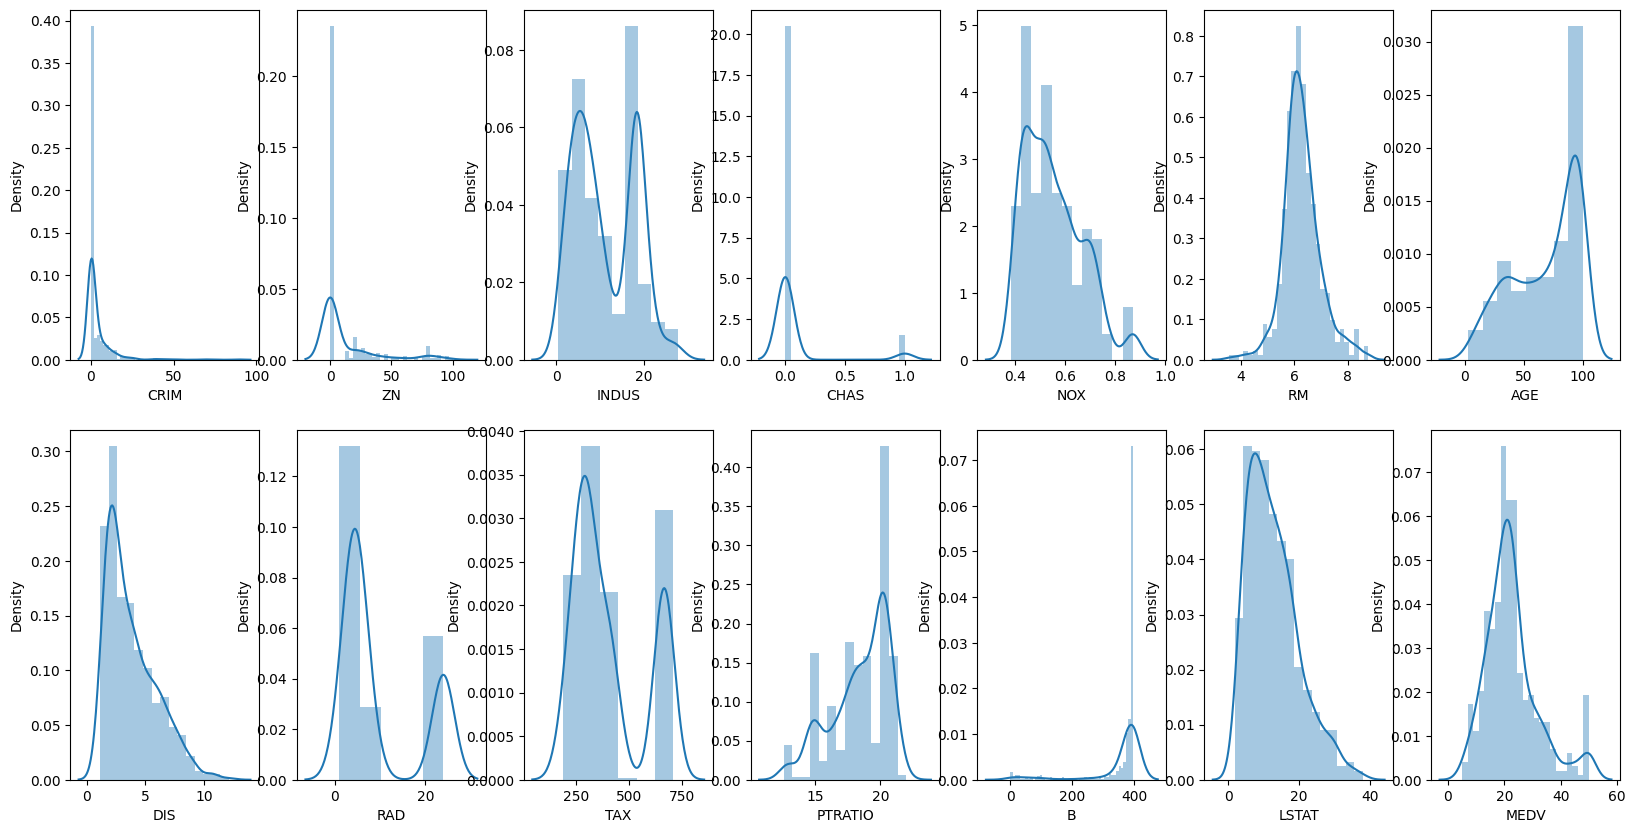

In [46]:
fig,axs=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=axs.flatten()
for k,v in data.items():
    sns.distplot(v,ax=ax[index])
    index+=1



In [47]:
x=data.drop(columns=['MEDV'])
y=data['MEDV']

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
dt=DecisionTreeRegressor()

In [50]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [51]:
y_pred=dt.predict(x_test)

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8374675745147206

In [53]:
from sklearn.ensemble import BaggingRegressor

In [62]:
bg=BaggingRegressor(n_estimators=30,oob_score=True)

In [63]:
bg.fit(x_train,y_train)

BaggingRegressor(n_estimators=30, oob_score=True)

In [64]:
y_pred=bg.predict(x_test)
r2_score(y_test,y_pred)

0.8810591089660054

In [66]:
bg.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}